In [1]:
import sys
sys.path.append('../../PI_GP_regressor')

from main_class import PhysicsInformedGP_regressor
from kernels.kernel_oscillator_3variables import gram_Matrix,k_ff, k_fu, k_uf, k_uu
import numpy as np

 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:838: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:850: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:873: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:882: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


(301,)

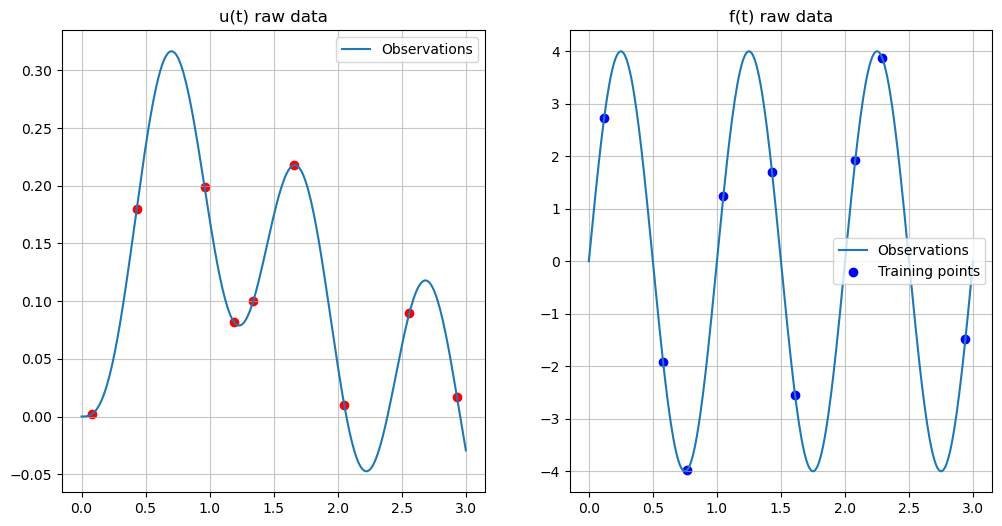

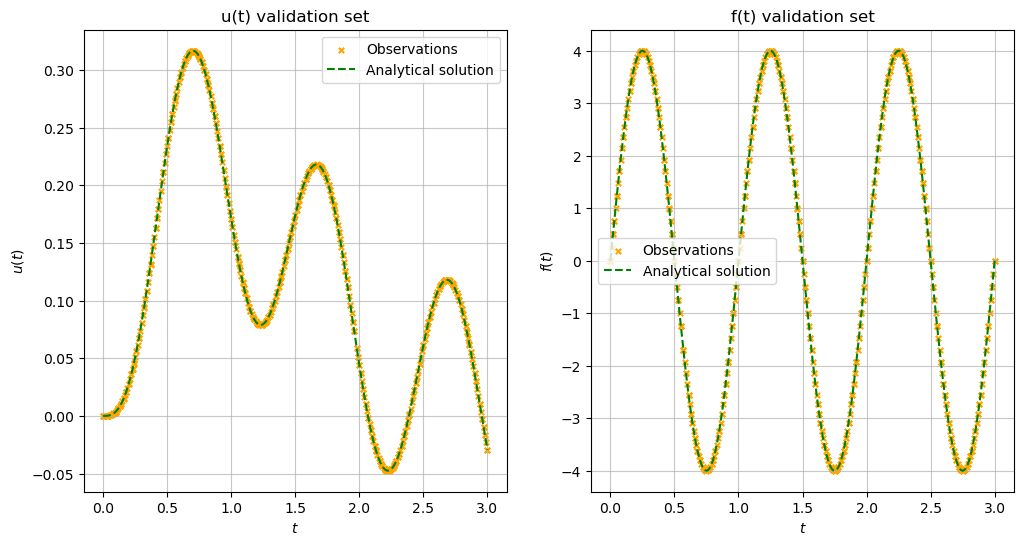

In [2]:
kernel = [gram_Matrix,k_uu,k_uf,k_fu,k_ff]
params = ["l","sigma_f","m","b","k"]
seeds_training = [50,14] #sets the seeds for the random training points--- change when the points are not optimal
model = PhysicsInformedGP_regressor(kernel,timedependence=False, params = params,Dimensions=1)
model.set_training_data("damped_m1k2b1.csv",9,[1e-8,1e-8],seeds_training)
model.plot_raw_data(Training_points=True)
model.set_validation_data(500)
model.plot_validation_set()
model.raw_data[2].shape

In [3]:
model.jitter = 1e-7
def get_initial_values():
    """returns the initial values for the hyperparameters
    for the length scales we initialize them randomly as log(l) ~ U(-2.5,1)
    """
    rng = np.random.default_rng()
    theta_initial = np.zeros((5))
    theta_initial[0] = np.exp(rng.uniform(-1.3, 0.3, 1))
    theta_initial[1] = rng.uniform(0, 1, 1)
    theta_initial[2] = rng.uniform(0, 2, 1)
    theta_initial[3] = rng.uniform(0, 3, 1)
    theta_initial[4] = rng.uniform(1, 4, 1)
    return theta_initial
n_iterations, n_threads = 1000, -1

# model.train("TNC",500,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
#                                            'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
#                                            'gtol': 1e-6})
model.train("TNC",n_iterations,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
                                            'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
                                            'gtol': 1e-7})
# model.train("L-BFGS-B",n_iterations,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
#                                             'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
#                                             'gtol': 1e-6})
      

100%|██████████| 1000/1000 [02:53<00:00,  5.75it/s]


     fun: -2.014984130859375
     jac: array([ 58.03125 , -11.302734, 118.56641 ,  14.274414, -41.864746],
      dtype=float32)
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 78
     nit: 10
  status: 1
 success: True
       x: array([0.45455811, 0.33824122, 0.9947142 , 1.92902725, 1.86430724])


In [ ]:
results = {"nf_n=9_melder": (np.array([0.47898825, 0.62987094, 0.998272  , 1.99920782, 2.00517421]),-4.336967468261719, [1e-8,1e-8]),
           "nf_n=9_TNC": (np.array([0.43243174, 0.30849485, 0.99643949, 1.98091363, 1.97461053]),-2.882169723510742, [1e-8,1e-8]),
            "nf_n=9_melder_4000":([0.48909158, 0.58601285, 0.99895693, 1.99258569, 1.99875862],-4.355005264282227, [1e-8,1e-8])}
#final example for now
# # # fun: -3.5418262481689453
# # #      jac: array([ 15.5      ,  -1.125    , 233.375    ,  24.640625 ,   3.1523438],
# # #       dtype=float32)
# # #  message: 'Converged (|f_n-f_(n-1)| ~= 0)'
# # #     nfev: 58
# # #      nit: 7
# # #   status: 1
# # #  success: True
# # #        x: array([0.50706766, 0.63494682, 0.99997171, 2.00199666, 2.00654081])

In [3]:
model.set_params([0.50706766, 0.63494682, 0.99997171, 2.00199666, 2.00654081])

 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:528: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:529: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:542: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:543: RuntimeWarning:invalid value encountered in sqrt


{'u': 0.0016545508073413154, 'f': 0.009802122821349043}

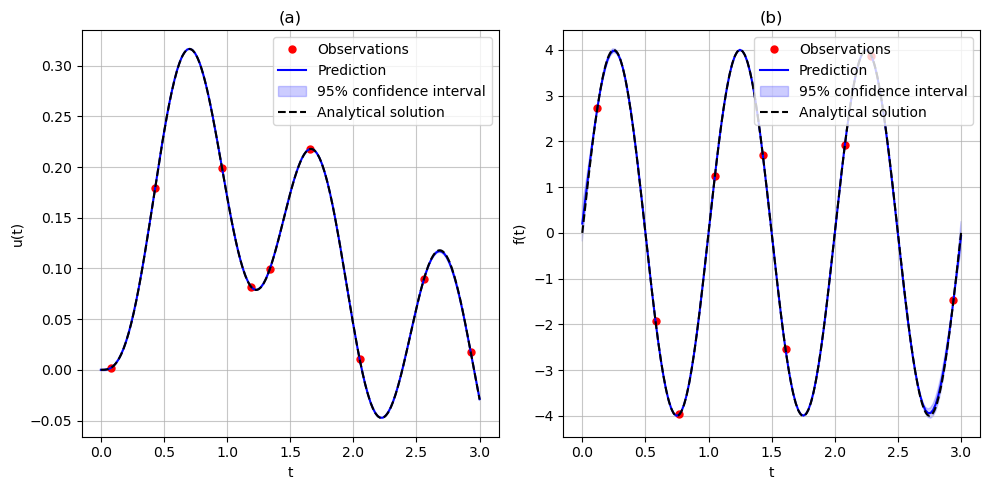

In [4]:
X_star = np.linspace(0,3,150).reshape(-1,1)
model.predict_model(X_star)
model.set_axis_labels("x","u(x)")
model.plot_prediction(X_star, "prediction", "prediction.png")
model.error()
model.rel_l2_error
#print(model)

 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:1033: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:1034: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:1047: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:1048: RuntimeWarning:invalid value encountered in sqrt


---------GPY--------
L_sq u:  0.1535635076639402
L_sq f:  0.5811610382943914


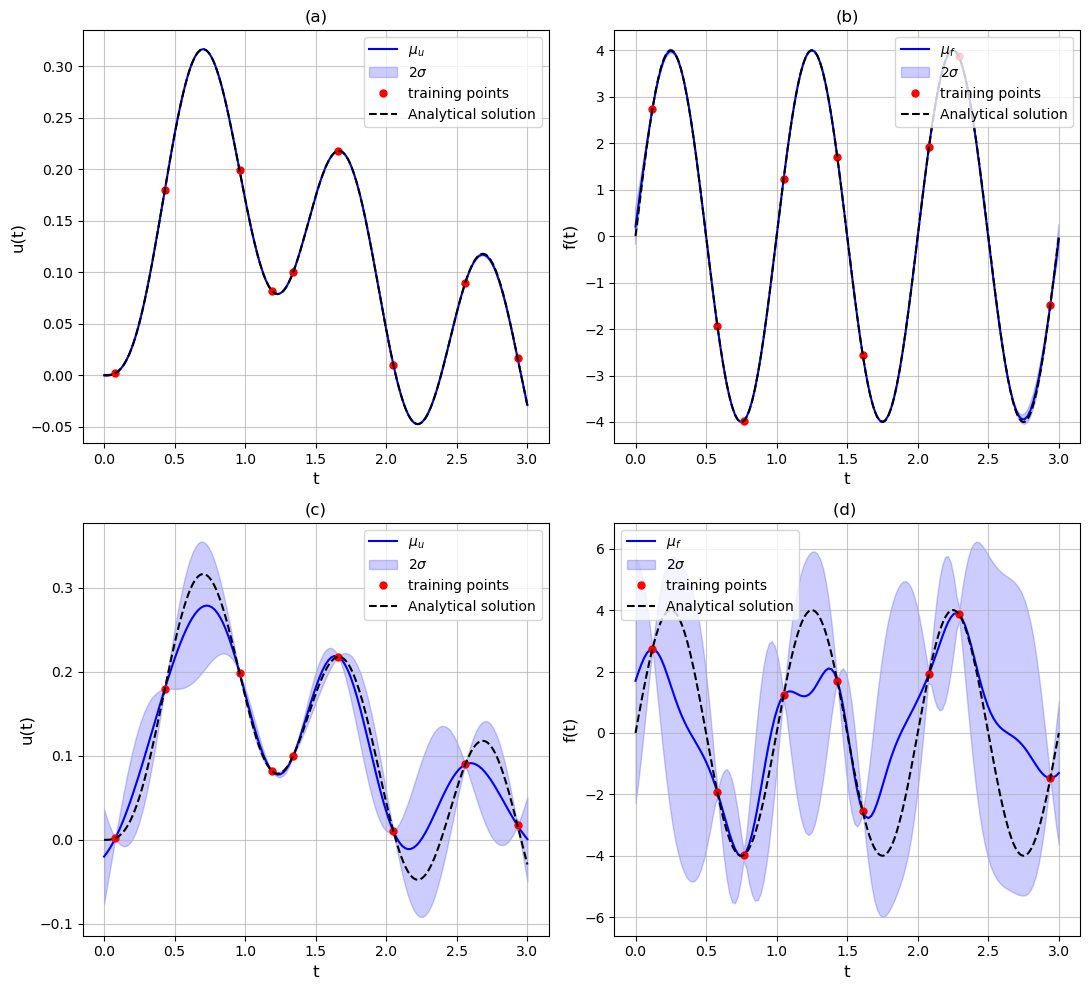

In [5]:
model.plot_merged_1d_plots(X_star, "merged_1d_plots.png",(11,10))

 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:838: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:850: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:873: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:882: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


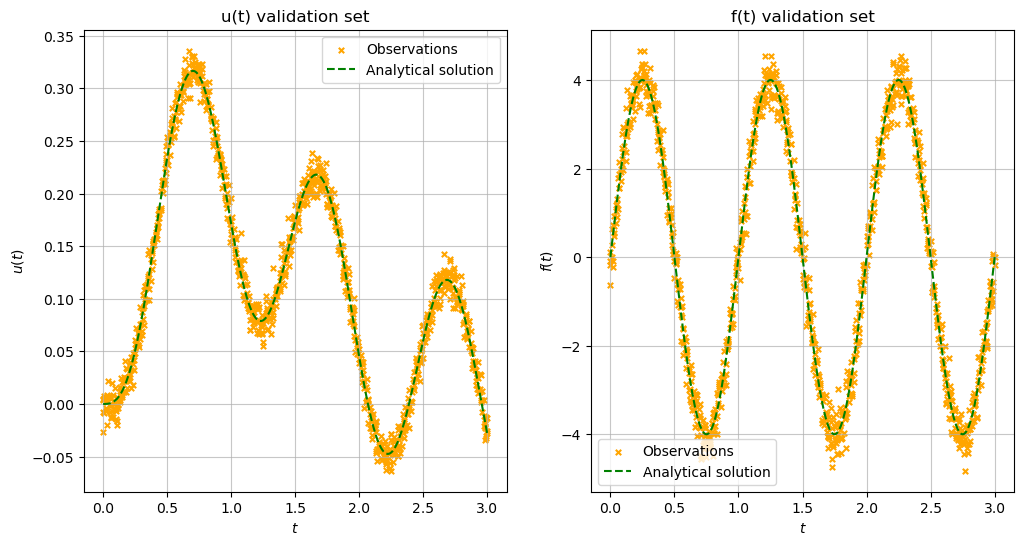

In [6]:
seeds_training = [50,38]
model2 = PhysicsInformedGP_regressor(kernel,timedependence=False, params = params,Dimensions=1)
model2.set_training_data("damped_m1k2b1.csv",9,[1e-4,1e-1],seeds_training)
model2.set_validation_data(1000)
model2.plot_validation_set()
#model2.plot_raw_data(Training_points=True)


In [7]:
n_iterations, n_threads = 800,12
model2.jitter = 1e-7
def get_initial_values():
    """returns the initial values for the hyperparameters
    for the length scales we initialize them randomly as log(l) ~ U(-2.5,1)
    """
    rng = np.random.default_rng()
    theta_initial = np.zeros((5))
    theta_initial[0] = np.exp(rng.uniform(-1.3, 0.3, 1))
    theta_initial[1] = rng.uniform(0, 1, 1)
    theta_initial[2] = rng.uniform(0, 3, 1)
    theta_initial[3] = rng.uniform(0, 3, 1)
    theta_initial[4] = rng.uniform(1, 4, 1)
    return theta_initial

model2.train("TNC",n_iterations,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
                                            'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
                                            'gtol': 1e-6})
# model.train("L-BFGS-B",n_iterations,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
#                                             'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
#                                             'gtol': 1e-6})model2.set_params(x2)

100%|██████████| 800/800 [02:15<00:00,  5.89it/s]


     fun: 3.552248001098633
     jac: array([ 0.02310181, -0.01776123, -0.00826263, -0.00285625,  0.00368261],
      dtype=float32)
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 90
     nit: 17
  status: 1
 success: True
       x: array([0.36343783, 0.2517642 , 0.98066055, 1.71232817, 0.95716655])


In [ ]:
#  fun: 3.552255153656006
#      jac: array([-0.06607056, -0.03323364, -0.00624084,  0.00410557,  0.00323439],
#       dtype=float32)
#  message: 'Converged (|f_n-f_(n-1)| ~= 0)'
#     nfev: 88
#      nit: 19
#   status: 1
#  success: True
#        x: array([0.36318723, 0.25125918, 0.98072583, 1.71377265, 0.95757517])

-----------------------------------------------
GP with kernel: 
Training data: (9, 1)
Training targets: (18, 1)
Hyperparameters: {'l': 0.3634378263910719, 'sigma_f': 0.2517642023533006, 'm': 0.9806605542919743, 'b': 1.7123281732211597, 'k': 0.957166550960125}
Log marginal likelihood: 3.552248001098633
Mean squared error: {'u': 0.00014353696315083653, 'f': 0.15426625311374664}
Relative l2 error: {'u': 0.07844310057383487, 'f': 0.1390955096436847}
-----------------------------------------------



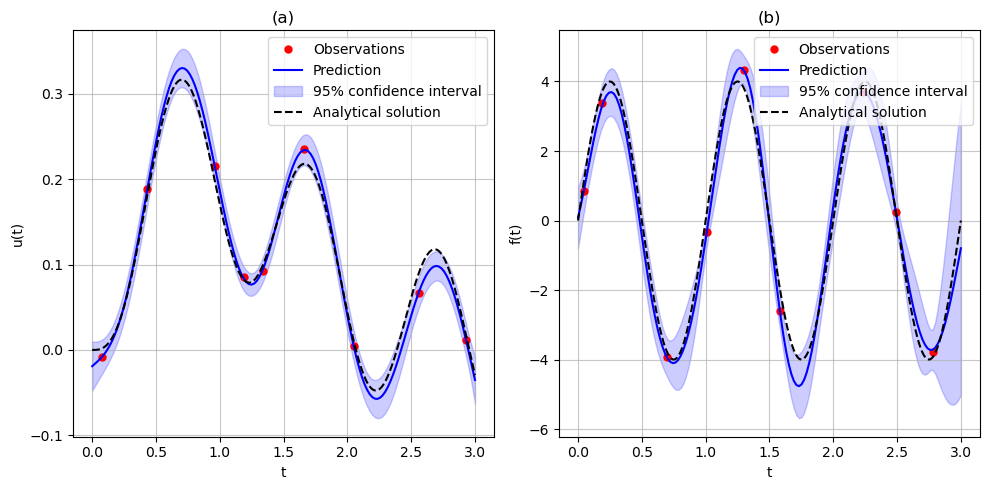

In [8]:
model2.predict_model(X_star)
model2.plot_prediction(X_star,"oscillator_with_noise.png","oscillator_noise.png")
model2.error()
print(model2)
#model2.plot_merged_1d_plots(X_star, "o",(11,10))

fun: 3.555784225463867  
     jac: array([-0.06851196,  0.01727295, -0.0453949 ,  0.00055313, -0.00218439],  
      dtype=float32) 
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'   
    nfev: 96   
     nit: 18   
  status: 1 
 success: True 
       x: array([0.36329879, 0.25175648, 0.9802112 , 1.71165971, 0.95101893]) 
{'u': 0.07846240055987475, 'f': 0.1390139924376683}   

 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:873: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:882: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


This is model with n =  4


100%|██████████| 800/800 [01:00<00:00, 13.24it/s]


Theta:  [0.12335172 0.14211252 0.23606354 0.10952567 2.37945181] 
 Log marginal likelihood:  4.217561721801758


 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:838: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:850: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:873: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:882: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


-----------------------------------------------------------
This is model with n =  5


100%|██████████| 800/800 [01:01<00:00, 13.01it/s]


Theta:  [ 0.51629442  0.21106246  3.09237282  3.12811503 10.18435033] 
 Log marginal likelihood:  3.7251830101013184


 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:838: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:850: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:873: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:882: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


-----------------------------------------------------------
This is model with n =  6


100%|██████████| 800/800 [01:01<00:00, 12.91it/s]


Theta:  [0.39863591 0.18221078 1.55279653 3.28395868 0.03469839] 
 Log marginal likelihood:  4.983731746673584


 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:542: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:543: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:838: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:850: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.p

-----------------------------------------------------------
This is model with n =  7


100%|██████████| 800/800 [00:54<00:00, 14.55it/s]


Theta:  [0.42136724 0.27811945 0.96825658 2.18018469 0.09718134] 
 Log marginal likelihood:  3.5400784015655518


 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:542: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:543: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:873: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:882: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


-----------------------------------------------------------
This is model with n =  8


100%|██████████| 800/800 [00:50<00:00, 15.86it/s]


Theta:  [0.45291874 0.34546367 0.96670757 2.05950756 0.70987567] 
 Log marginal likelihood:  0.4321479797363281


 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:542: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:543: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:838: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:850: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.p

-----------------------------------------------------------
This is model with n =  10


100%|██████████| 800/800 [01:03<00:00, 12.56it/s]


Theta:  [0.49194968 0.61993143 0.99820874 1.99412387 1.99136964] 
 Log marginal likelihood:  -9.966036796569824


 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:528: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:529: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:542: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:543: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:838: UserWarning:The balance properties of Sobol' points require

-----------------------------------------------------------
This is model with n =  12


100%|██████████| 800/800 [00:50<00:00, 15.69it/s]


Theta:  [0.48771327 0.50890558 1.00000289 2.00026807 2.00229257] 
 Log marginal likelihood:  -18.465282440185547


 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:528: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:529: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:542: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:543: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:838: UserWarning:The balance properties of Sobol' points require

-----------------------------------------------------------
This is model with n =  15


100%|██████████| 800/800 [00:53<00:00, 14.86it/s]


Theta:  [0.44976085 0.34786879 1.00069509 2.0046303  2.00816048] 
 Log marginal likelihood:  -33.764686584472656


 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:528: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:529: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:542: RuntimeWarning:invalid value encountered in sqrt
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:543: RuntimeWarning:invalid value encountered in sqrt


-----------------------------------------------------------


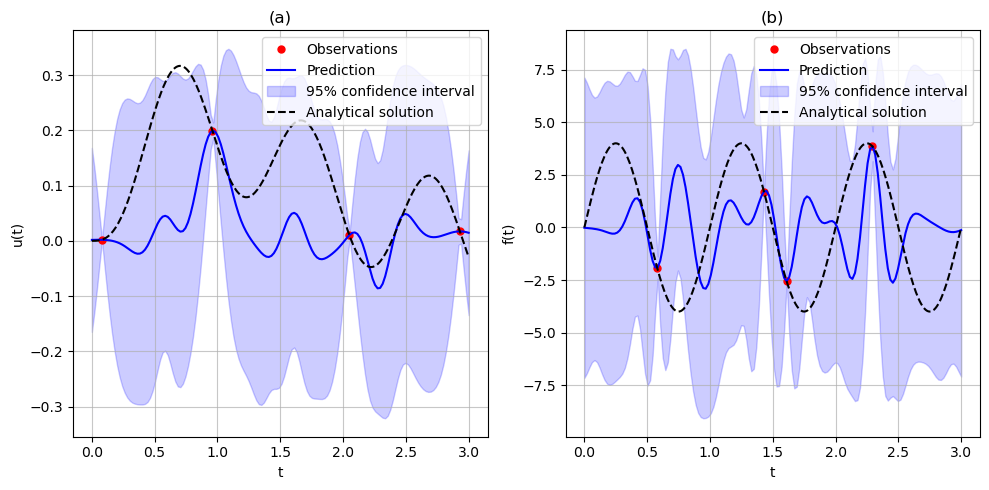

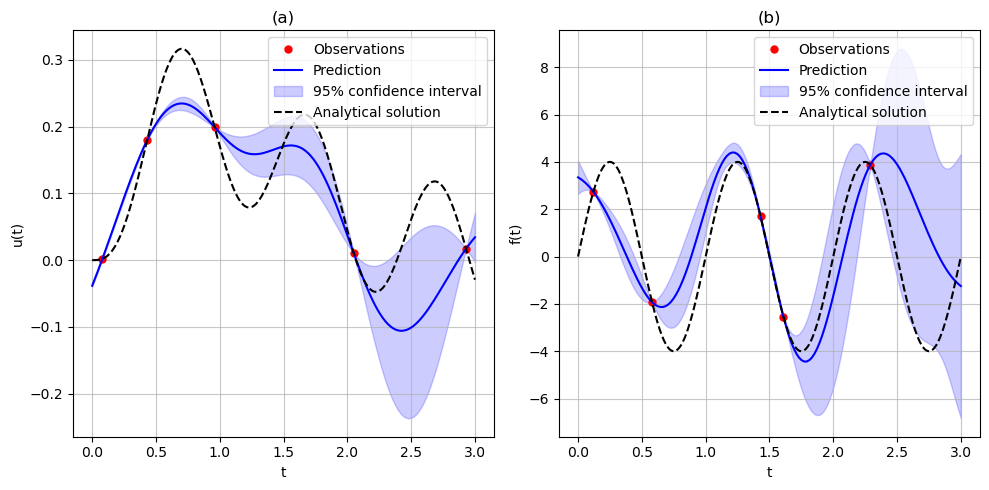

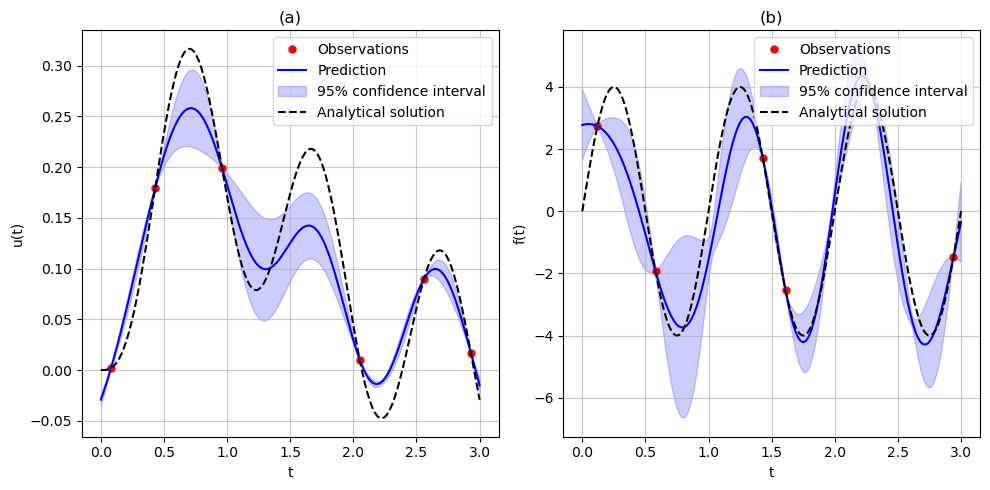

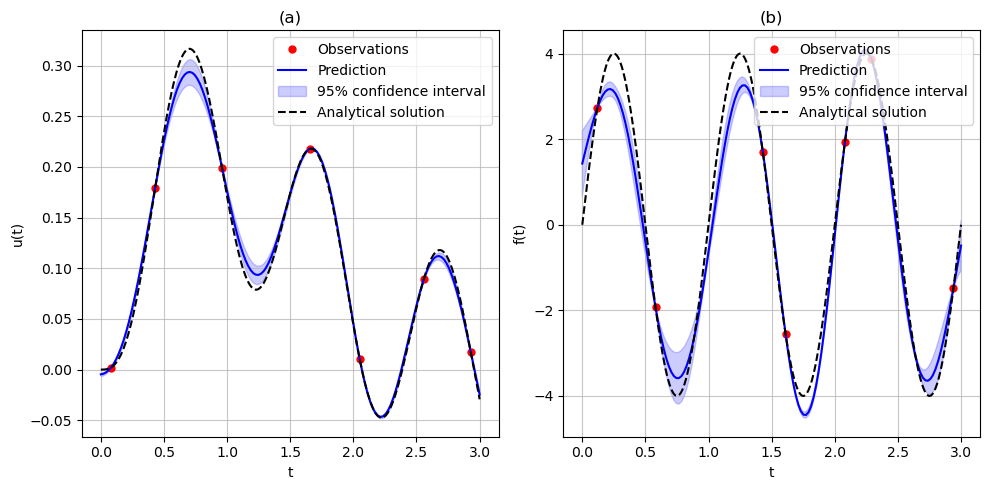

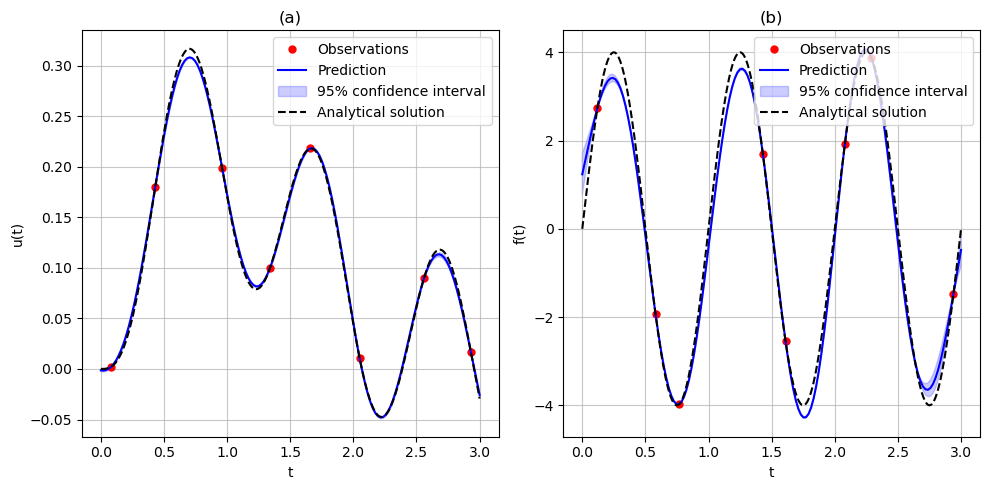

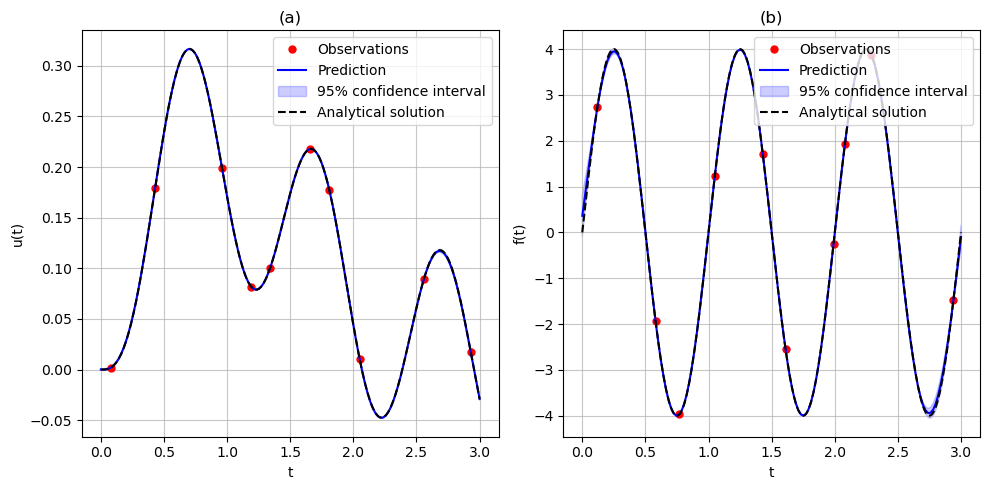

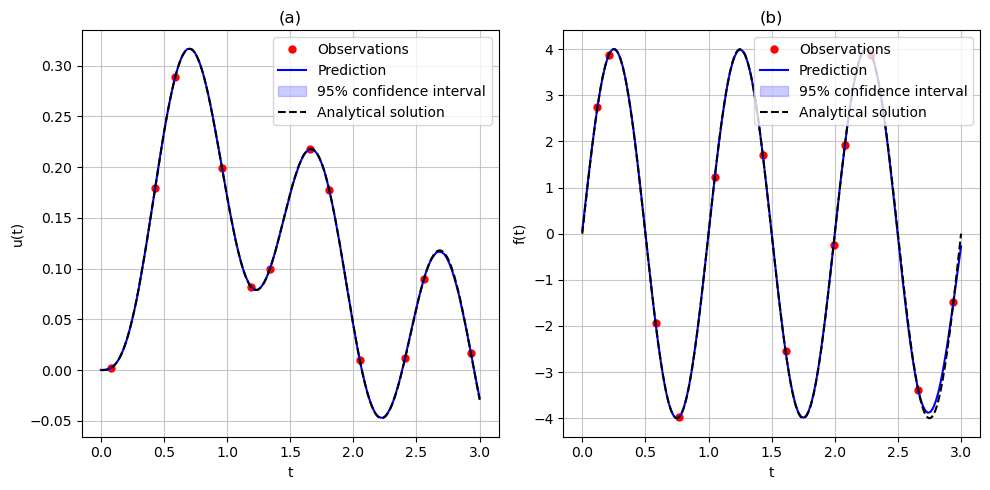

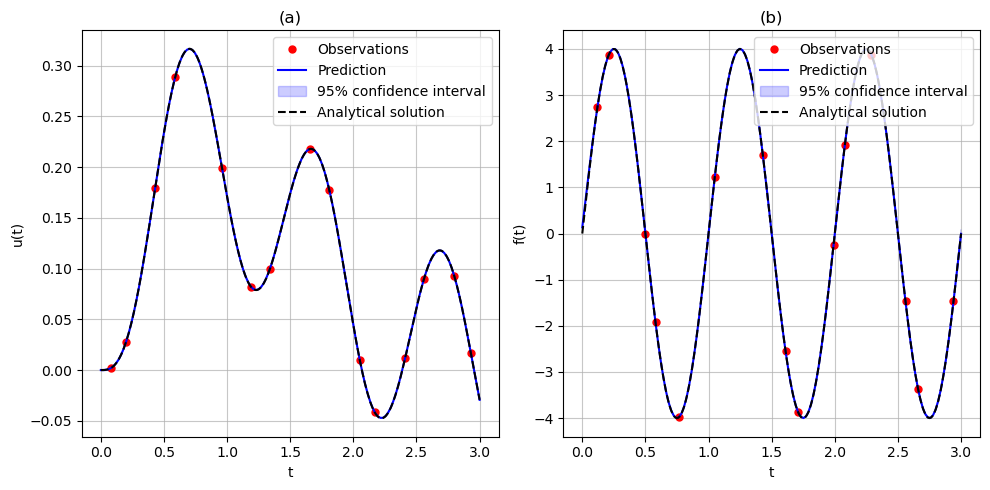

In [3]:
X_star = np.linspace(0,3,150).reshape(-1,1)
model.jitter = 1e-7
def get_initial_values():
    """returns the initial values for the hyperparameters
    for the length scales we initialize them randomly as log(l) ~ U(-2.5,1)
    """
    rng = np.random.default_rng()
    theta_initial = np.zeros((5))
    theta_initial[0] = np.exp(rng.uniform(-1.3, 0.3, 1))
    theta_initial[1] = rng.uniform(0, 1, 1)
    theta_initial[2] = rng.uniform(0, 3, 1)
    theta_initial[3] = rng.uniform(0, 3, 1)
    theta_initial[4] = rng.uniform(1, 4, 1)
    return theta_initial
n_iterations = 800
models = []
l_2_errors = []
n_training = [4,5,6,7,8,10,12,15]
for n in n_training:
    print("This is model with n = ", n)
    modeln = PhysicsInformedGP_regressor(kernel,timedependence=False, params = params,Dimensions=1)
    modeln.set_training_data("damped_m1k2b1.csv",n,[1e-8,1e-8],seeds_training)
    modeln.set_validation_data(1000)
    modeln.train("Nelder-Mead",n_iterations,12,{'theta_initial': get_initial_values,   #needed for all optimization methods
                                            'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
                                            'gtol': 1e-7})
    modeln.predict_model(X_star)
    modeln.plot_prediction(X_star,"",None)
    modeln.error()
    #modeln.MSE
    #print(modeln)
    #print(model.rel_l2_error)
    models.append(modeln)
    l_2_errors.append(modeln.rel_l2_error)
    print("-----------------------------------------------------------")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[{'u': 0.8690709932925377, 'f': 1.091642526201027}
 {'u': 0.4895237661960078, 'f': 0.7916111640093978}
 {'u': 0.23332144521928758, 'f': 0.33132797352892984}
 {'u': 0.0572891180603079, 'f': 0.17492255042274707}
 {'u': 0.023242043335644124, 'f': 0.11215479819338975}
 {'u': 0.001701862168625464, 'f': 0.016086702769257222}
 {'u': 0.003273239603180717, 'f': 0.017502734504944266}
 {'u': 0.0005289161666288675, 'f': 0.004799149086382682}]


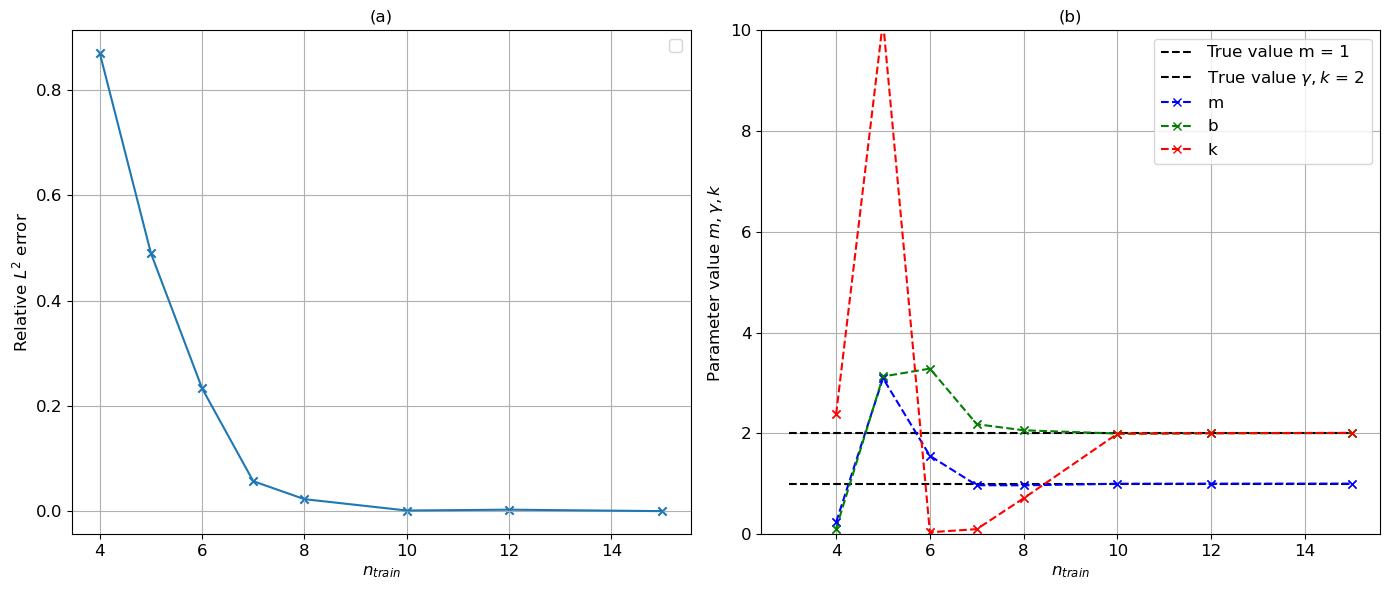

In [4]:
import matplotlib as mpl
thetas = [x.params for x in models]
l_2_errors = np.array(l_2_errors)
print(l_2_errors)
l2_u = [x['u'] for x in l_2_errors]
import matplotlib.pyplot as plt
fontsize = 12
mpl.rcParams['axes.labelsize'] = fontsize
mpl.rcParams['axes.titlesize'] = fontsize
mpl.rcParams['xtick.labelsize'] = fontsize
mpl.rcParams['ytick.labelsize'] = fontsize
mpl.rcParams['legend.fontsize'] = fontsize
fig, ax = plt.subplots(1,2,figsize=(14,6))
ax[0].plot(n_training,l2_u)
ax[0].scatter(n_training,l2_u,marker="x")
ax[0].set_xlabel("$n_{train}$")
ax[0].grid()
ax[0].set_ylabel("Relative $L^2$ error")
ax[0].set_title("(a)")
ax[0].legend()

ax[1].hlines(1,3,15,linestyles="dashed",label="True value m = 1",colors="black")
ax[1].hlines(2,3,15,linestyles="dashed",label="True value $\\gamma,k$ = 2",colors="black")
ax[1].plot(n_training,[x['m'] for x in thetas],label="m",marker="x",linestyle="--",alpha=1,color = "blue")
ax[1].plot(n_training,[x['b'] for x in thetas],label="b",marker="x",linestyle="--",alpha=1,color= "green")
ax[1].plot(n_training,[x['k'] for x in thetas],label="k",marker="x",linestyle="--",alpha=1,color= "red")

ax[1].plot(n_training,[x['m'] for x in thetas],marker="x",linestyle="None",color = "blue")
ax[1].plot(n_training,[x['b'] for x in thetas],marker="x",linestyle="None",color= "green")
ax[1].plot(n_training,[x['k'] for x in thetas],marker="x",linestyle="None",color= "red")
ax[1].legend()
ax[1].set_ylim(0,10)
ax[1].set_xlabel("$n_{train}$")
ax[1].grid()
ax[1].set_ylabel("Parameter value $m, \\gamma, k$")
ax[1].set_title("(b)")
plt.tight_layout()
plt.savefig("l2_error.png")



---------GPY--------
MSE u:  0.6207507442264911
MSE f:  0.9400666690463485
---------GPY--------
MSE u:  0.5049818517221535
MSE f:  0.921407150696749
---------GPY--------
MSE u:  0.5709377216582673
MSE f:  0.9920481098464274
---------GPY--------
MSE u:  0.37803871449089466
MSE f:  0.9118865163057553
---------GPY--------
MSE u:  0.26438519047225234
MSE f:  0.5773283945405815
---------GPY--------
MSE u:  0.06745914036180319
MSE f:  0.3990042889615579
---------GPY--------
MSE u:  0.00773347616432754
MSE f:  0.07020603792454287
---------GPY--------
MSE u:  0.002897412326217305
MSE f:  0.004112378062660578


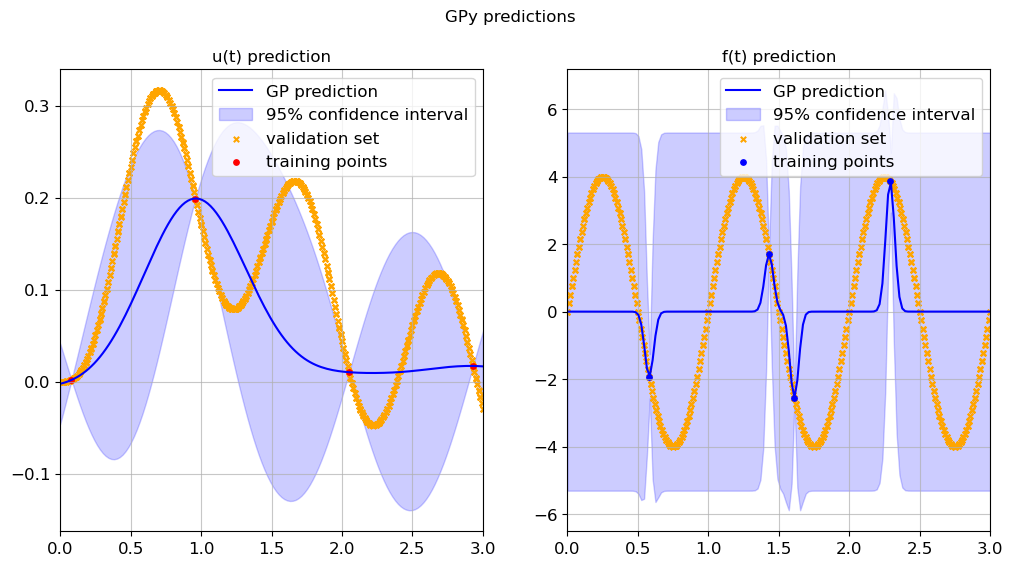

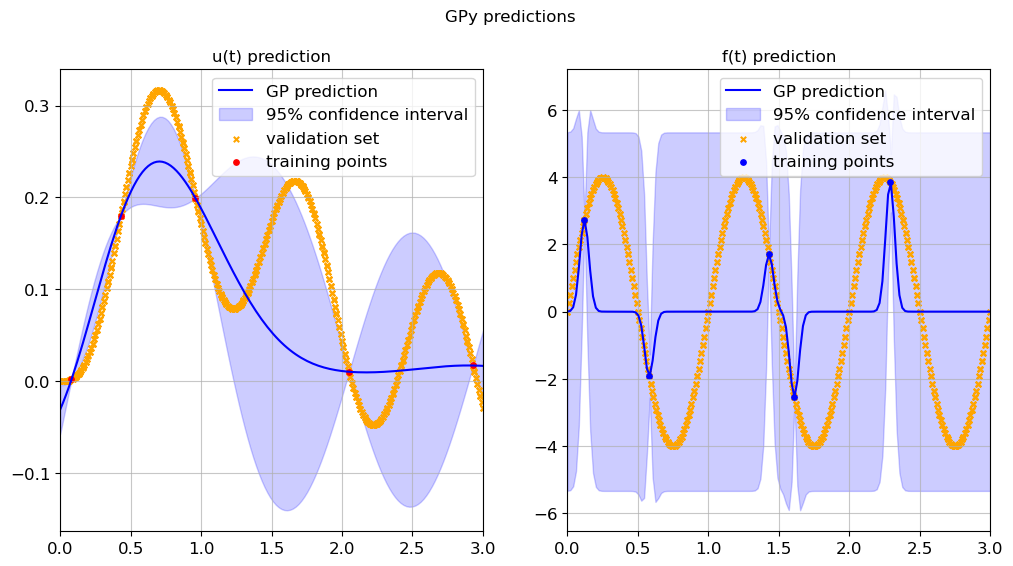

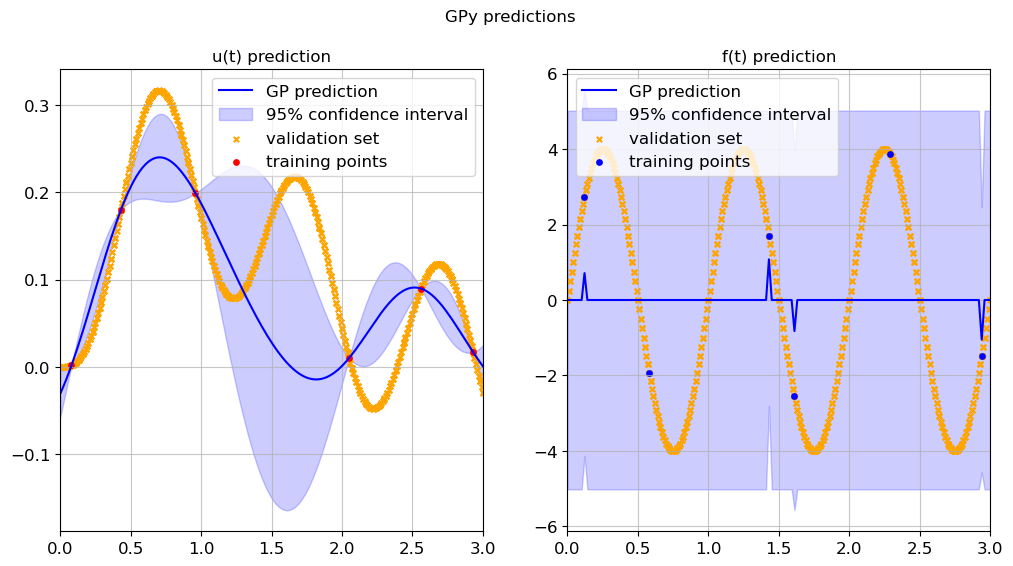

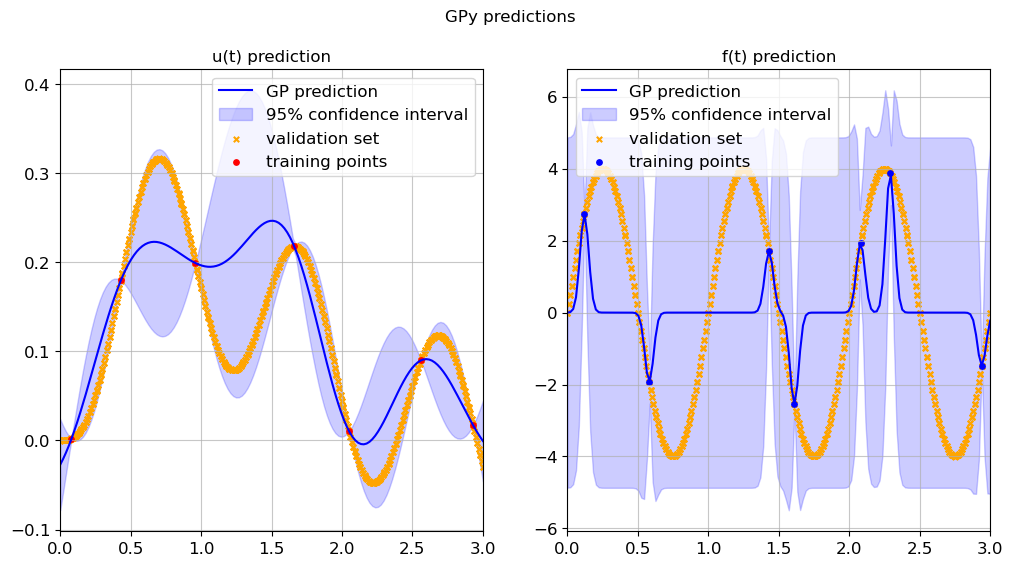

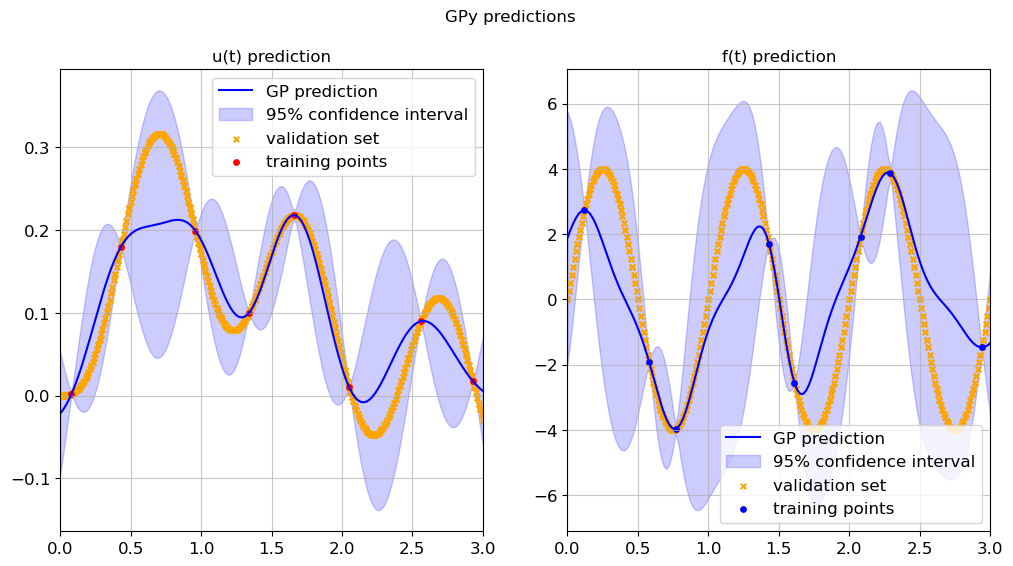

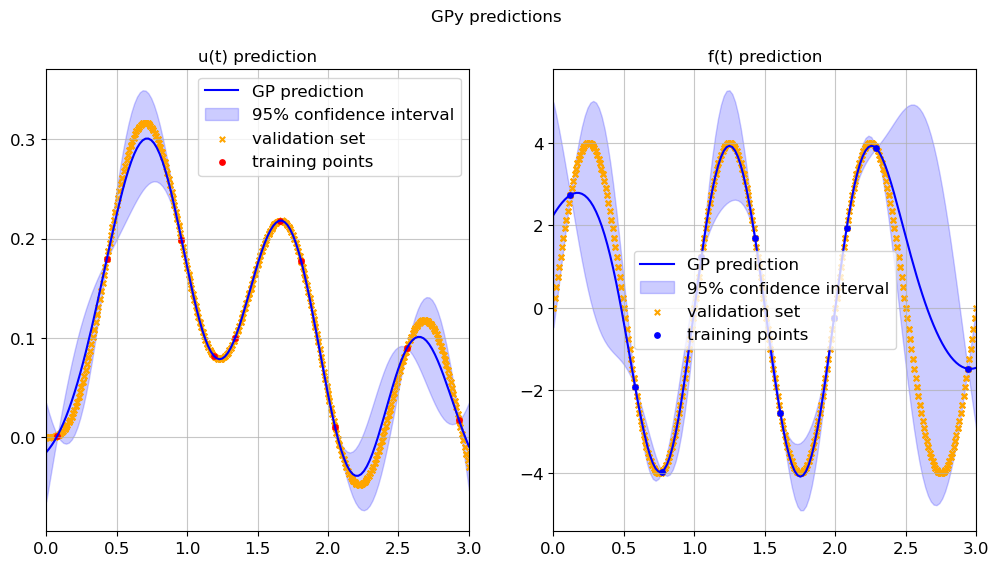

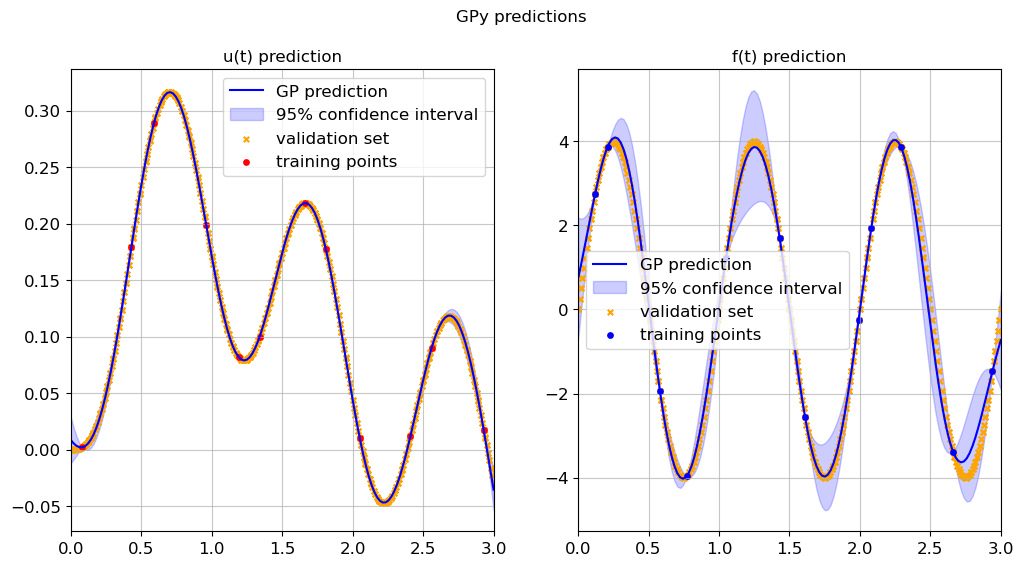

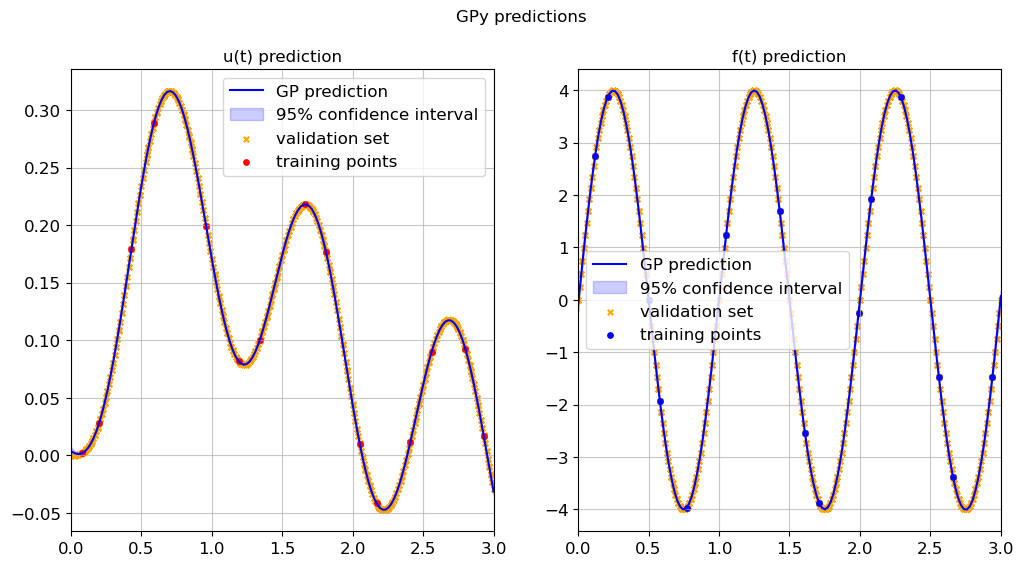

In [5]:
for m in models:
    m.use_GPy(X_star)


 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:838: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:850: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:873: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:882: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


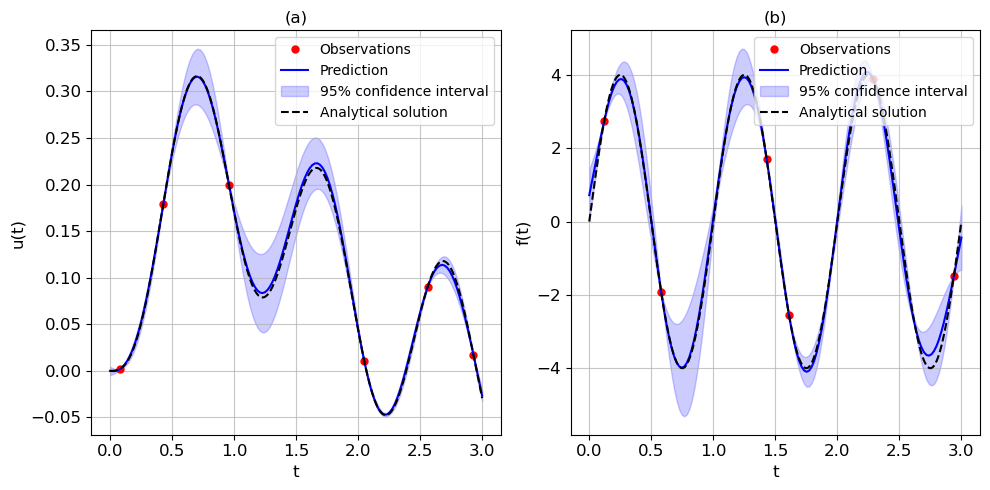

In [14]:
modeln = PhysicsInformedGP_regressor(kernel,timedependence=False, params = params,Dimensions=1)
modeln.set_training_data("damped_m1k2b1.csv",6,[1e-8,1e-8],seeds_training)
modeln.set_validation_data(1000)
modeln.set_params(([0.44976085, 0.34786879, 1.00069509, 2.0046303,  2.00816048] ))
modeln.predict_model(X_star)
modeln.plot_prediction(X_star,"",None)